In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import comb, logsumexp

# Particle loss

In [3]:
#Particle loss case: nu dominated by q
def nu_q(q):
    return (3*q**2-2*q+1)/(2*q**2-2*q+1)

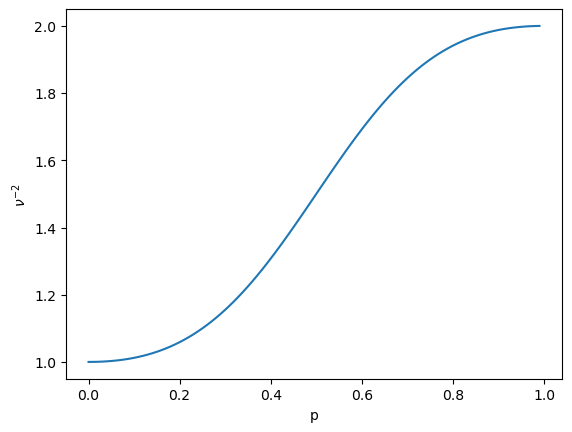

In [69]:
p = np.arange(0,1, 0.01)
y = []
for i in range(len(p)):
    y.append(nu_q(p[i]))
plt.xlabel('p')
plt.ylabel('$ν^{-2}$')
plt.plot(p, y, label='nu')
plt.savefig("Particle loss case, nu")
plt.show()

In [6]:
#Particle loss case: q = O(\sqrt{log n/n})
def q(n):
    return np.sqrt(np.log(n)/n)

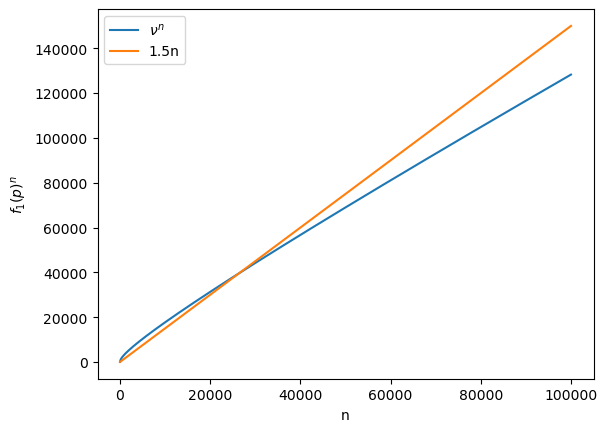

In [59]:
n = range(10, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu_q(q(n[i]))**n[i])
    y2.append(1.5*n[i])

plt.plot(n, y, label = '$ν^n$')
plt.plot(n, y2, label = '1.5n')
plt.xlabel('n')
plt.ylabel('$f_1(p)^n$')
plt.legend()
plt.savefig("Particle loss case, polynomial", bbox_inches='tight')
plt.show()

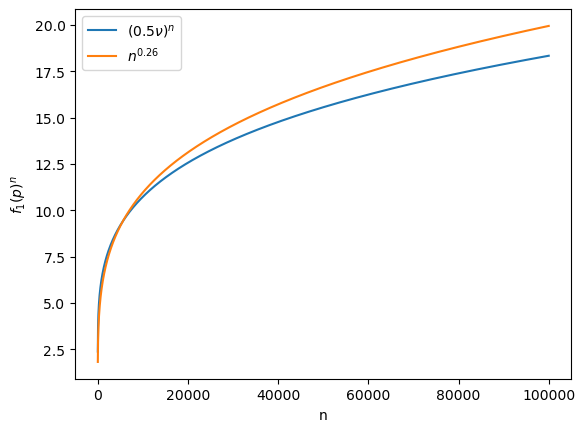

In [57]:
n = range(10, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu_q(0.5*q(n[i]))**n[i])
    y2.append(n[i]**0.26)

plt.plot(n, y, label = '$(0.5ν)^n$')
plt.plot(n, y2, label = '$n^{0.26}$')
plt.xlabel('n')
plt.ylabel('$f_1(p)^n$')
plt.legend()
plt.savefig("Particle loss case, polynomial2", bbox_inches='tight')
plt.show()

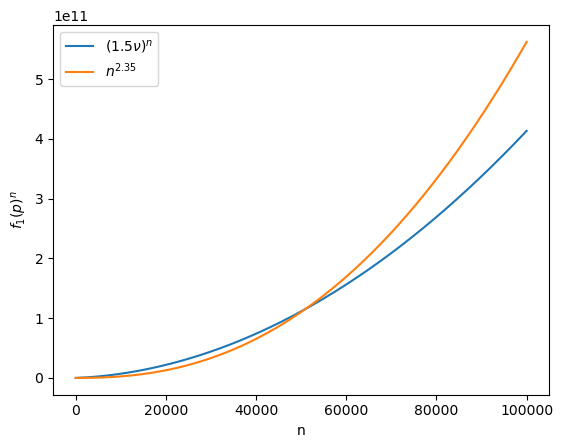

In [55]:
n = range(10, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu_q(1.5*q(n[i]))**n[i])
    y2.append(n[i]**2.35)

plt.plot(n, y, label = '$(1.5ν)^n$')
plt.plot(n, y2, label = '$n^{2.35}$')
plt.xlabel('n')
plt.ylabel('$f_1(p)^n$')
plt.legend()
plt.savefig("Particle loss case, polynomial3", bbox_inches='tight')
plt.show()

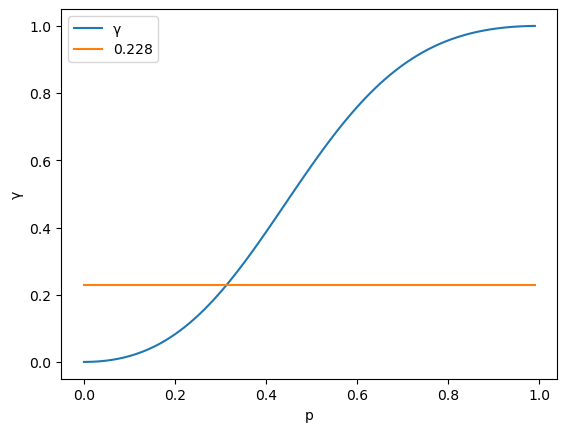

In [67]:
n = 100
p = np.arange(0,1, 0.01)
y = []
for i in range(len(p)):
    y.append(np.log2(nu_q(p[i])))
plt.xlabel('p')
plt.ylabel('γ')
plt.plot(p, y, label='γ')
plt.plot(p, [0.228]*len(p), label = '0.228')
plt.legend()
plt.savefig("Particle loss case, gamma")
plt.show()

In [8]:
def required_bytes_matrix(n):
    #8n x 8n complex matrix
    return (8+8)*(8*n)*(8*n) #(int + com)*(The number of components)

In [10]:
def required_bytes_loss(n, q, delta):
    k = find_k(n,q,delta)
    chi = (nu_q(q)**k)*4/delta
    Total_bytes = chi*((8+8)+required_bytes_matrix(n)) + (8+8)*(8*n)*(8*n)
    return Total_bytes

In [12]:
def find_k(n,p,delta):
    return np.ceil(n*(2*p**2 -2*p + 1 + np.sqrt(np.log(1/delta)/(2*n))))

In [87]:
len(N[1])

2000

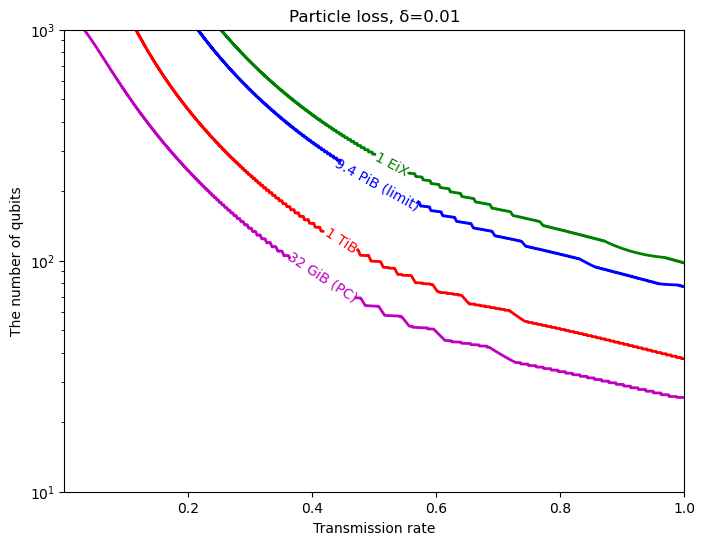

In [91]:
delta = 0.01
ps = np.linspace(0.001, 1.0, 2000)
ns = np.linspace(10, 1000, 2000)
ks = []
for i in range(len(ps)):
    ks.append(find_k(ns[i],ps[i],delta))
ks = np.array(ks)
P, N = np.meshgrid(ps, ns)
Z = required_bytes_loss(N/4, P, delta) #For each $|\psi_4>$, 4 qubits are required.

fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')

CS_pb = ax.contour(P, N, Z, levels=[9.4*(1024**5)],
                   colors='blue', linewidths=2)
ax.clabel(CS_pb, inline=True, fmt={9.4*(1024**5): '9.4 PiB (limit)'},
          manual=[(0.5,200)], fontsize=10)

CS_ex = ax.contour(P, N, Z, levels=[1024**6],
                   colors='green', linewidths=2)
ax.clabel(CS_ex, inline=True, fmt={1024**6: '1 EiX'},
          manual=[(0.5,200)], fontsize=10)

CS_tb = ax.contour(P, N, Z, levels=[1024**4],
                   colors='red', linewidths=2)
ax.clabel(CS_tb, inline=True, fmt={1024**4: '1 TiB'},
          manual=[(0.5,200)], fontsize=10)

CS_gb = ax.contour(P, N, Z, levels=[32*1024**3],
                   colors='m', linewidths=2)
ax.clabel(CS_gb, inline=True, fmt={32*1024**3: '32 GiB (PC)'},
          manual=[(0.5,200)], fontsize=10)

ax.set_title('Particle loss, δ=0.01')
ax.set_xlabel('Transmission rate')
ax.set_ylabel('The number of qubits')
plt.savefig('Particle loss.png')
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3458595533.py:20: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y1, label='$\delta = 0.01$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3458595533.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y2, label='$\delta = 0.03$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3458595533.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y3, label='$\delta = 0.05$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3458595533.py:14: RuntimeWarning: overflow encountered in scalar divide
  y1.append(np.log2(4*nu_q(p[i])**k1/delta1))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3458595533.py:14

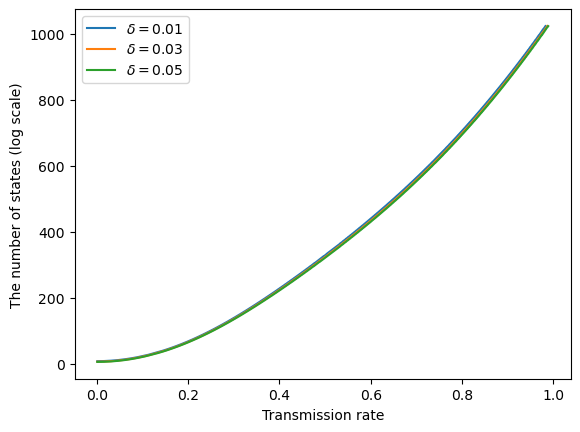

In [123]:
n = 1000
delta1 = 0.01
delta2 = 0.03
delta3 = 0.05

p = np.linspace(0.001, 1, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(n, p[i], delta1)
    k2 = find_k(n, p[i], delta2)
    k3 = find_k(n, p[i], delta3)
    y1.append(np.log2(4*nu_q(p[i])**k1/delta1))
    y2.append(np.log2(4*nu_q(p[i])**k2/delta2))
    y3.append(np.log2(4*nu_q(p[i])**k3/delta3))

plt.xlabel('Transmission rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$\delta = 0.01$')
plt.plot(p, y2, label='$\delta = 0.03$')
plt.plot(p, y3, label='$\delta = 0.05$')
plt.legend()
plt.show()


<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Particle loss (FLO), $\delta=0.01$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:16: RuntimeWarning: overflow encountered in scalar divide
  y3.append(np.log2(4*nu_q(p[i])**k3/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:16: RuntimeWarning: overflow encountered in scalar multiply
  y3.append(np.log2(4*nu_q(p[i])**k3/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:16: RuntimeWarning: overflow encountered in scalar power
  y3.append(np.log2(4*nu_q(p[i])**k3/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:15: RuntimeWarning: overflow encountered in scalar divide
  y2.append(np.log2(4*nu_q(p[i])**k2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4203519244.py:15: Runti

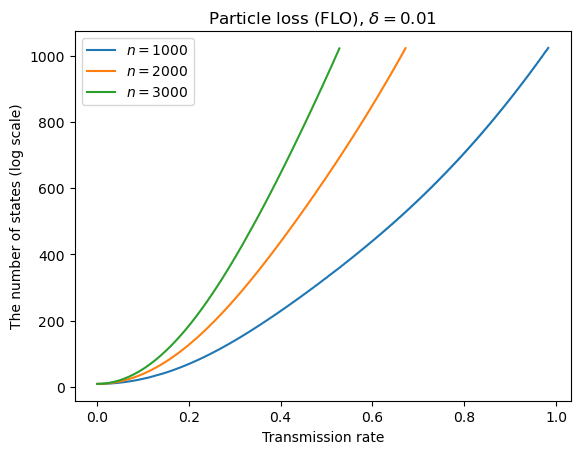

In [13]:
delta = 0.01
n1 = 1000
n2 = 2000
n3 = 3000

p = np.linspace(0.001, 1, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(n1, p[i], delta)
    k2 = find_k(n2, p[i], delta)
    k3 = find_k(n3, p[i], delta)
    y1.append(np.log2(4*nu_q(p[i])**k1/delta))
    y2.append(np.log2(4*nu_q(p[i])**k2/delta))
    y3.append(np.log2(4*nu_q(p[i])**k3/delta))

plt.xlabel('Transmission rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$n=1000$')
plt.plot(p, y2, label='$n=2000$')
plt.plot(p, y3, label='$n=3000$')
plt.legend()
plt.title('Particle loss (Fermion), $\delta=0.01$')
plt.savefig('Particle loss over n.png')
plt.show()


# Dephasing error

In [15]:
#Dephasing error case: nu dominated by p
def nu1_p(p):
    return 1+ (1-2*p)**4

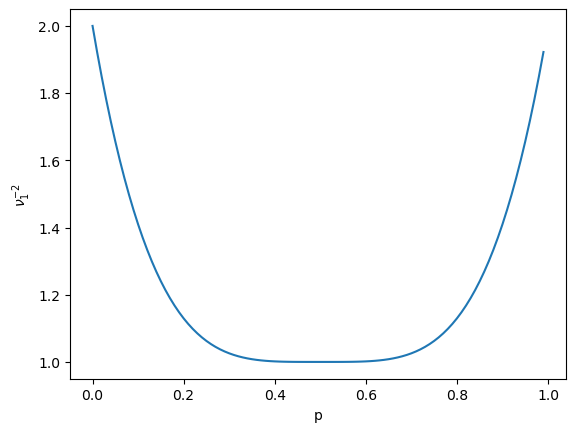

In [71]:
p = np.arange(0,1, 0.01)
y = []
for i in range(len(p)):
    y.append(nu1_p(p[i]))
plt.xlabel('p')
plt.ylabel('$ν_1^{-2}$')
plt.plot(p, y, label='nu')
plt.savefig("Dephasing error case, nu")
plt.show()

In [17]:
#Dephasing error case: nu dominated by q = 1-2p
def nu1_q(q):
    return 1+q**4

In [19]:
#Dephasing error case: q = O((log n/n)^(1/4))
def q1(n):
    return np.power(np.log(n)/n, 1/4)

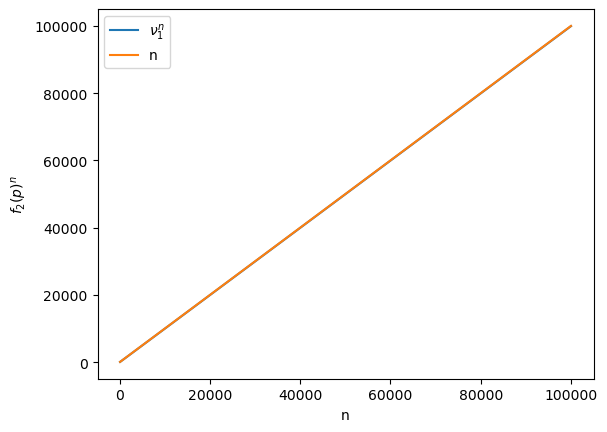

In [49]:
n = range(100, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu1_q(q1(n[i]))**n[i])
    y2.append(n[i])

plt.plot(n, y, label = '$ν_1^n$')
plt.plot(n, y2, label = 'n')
plt.xlabel('n')
plt.ylabel('$f_2(p)^n$')
plt.legend()
plt.savefig("Dephasing error case, polynomial", bbox_inches='tight')
plt.show()

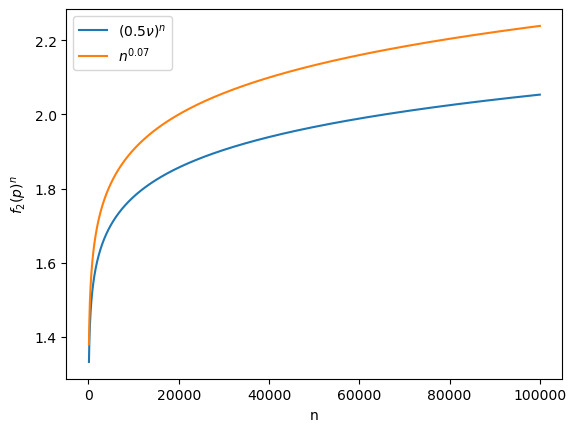

In [51]:
n = range(100, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu1_q(0.5*q1(n[i]))**n[i])
    y2.append(n[i]**0.07)

plt.plot(n, y, label = '$(0.5ν)^n$')
plt.plot(n, y2, label = '$n^{0.07}$')
plt.xlabel('n')
plt.ylabel('$f_2(p)^n$')
plt.legend()
plt.savefig("Dephasing error case, polynomial2", bbox_inches='tight')
plt.show()

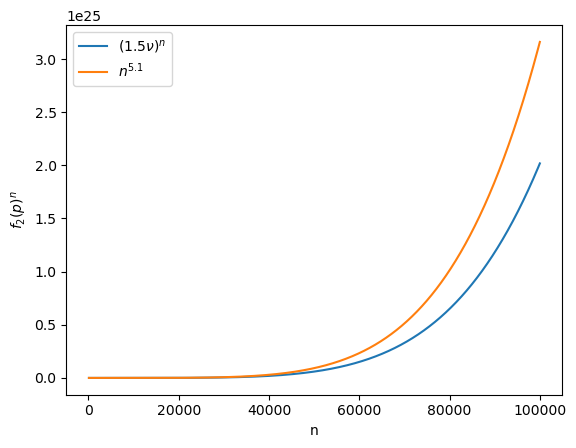

In [53]:
n = range(100, 100000, 10)
y = []
y2 = []
for i in range(len(n)):
    y.append(nu1_q(1.5*q1(n[i]))**n[i])
    y2.append(n[i]**5.1)

plt.plot(n, y, label = '$(1.5ν)^n$')
plt.plot(n, y2, label = '$n^{5.1}$')
plt.xlabel('n')
plt.ylabel('$f_2(p)^n$')
plt.legend()
plt.savefig("Dephasing error case, polynomial3", bbox_inches='tight')
plt.show()

In [21]:
def required_bytes_matrix(n):
    #8n x 8n complex matrix
    return (8+8)*(8*n)*(8*n) #(int + com)*(The number of components)

In [23]:
def required_bytes_dephasing(n, q, delta):
    chi = (nu1_p(q)**n)*4/delta
    Total_bytes = chi*((8+8)+required_bytes_matrix(n)) + (8+8)*(8*n)*(8*n)
    return Total_bytes

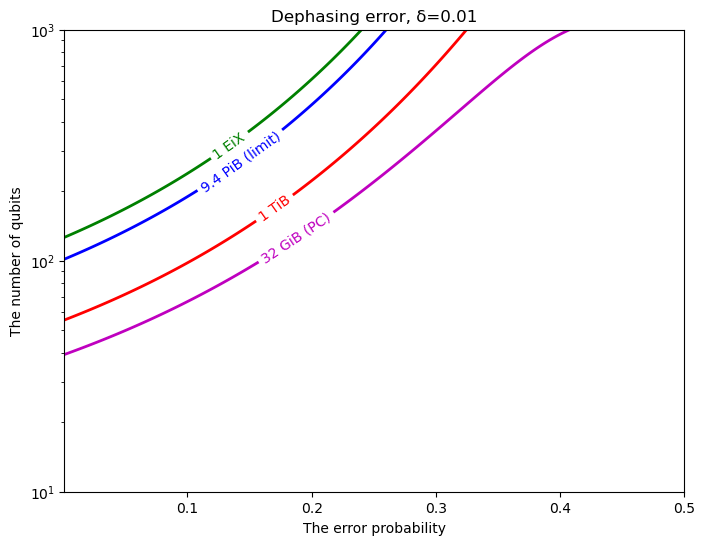

In [107]:
delta = 0.01
ps = np.linspace(0.001, 0.5, 2000)
ns = np.linspace(10, 1000, 2000)
P, N = np.meshgrid(ps, ns)
Z = required_bytes_dephasing(N/4, P, delta) #For each $|\psi_4>$, 4 qubits are required.

fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')

CS_pb = ax.contour(P, N, Z, levels=[9.4*(1024**5)],
                   colors='blue', linewidths=2)
ax.clabel(CS_pb, inline=True, fmt={9.4*(1024**5): '9.4 PiB (limit)'},
          manual=[(0.2,100)], fontsize=10)

CS_ex = ax.contour(P, N, Z, levels=[1024**6],
                   colors='green', linewidths=2)
ax.clabel(CS_ex, inline=True, fmt={1024**6: '1 EiX'},
          manual=[(0.2,100)], fontsize=10)

CS_tb = ax.contour(P, N, Z, levels=[1024**4],
                   colors='red', linewidths=2)
ax.clabel(CS_tb, inline=True, fmt={1024**4: '1 TiB'},
          manual=[(0.2,100)], fontsize=10)

CS_gb = ax.contour(P, N, Z, levels=[32*1024**3],
                   colors='m', linewidths=2)
ax.clabel(CS_gb, inline=True, fmt={32*1024**3: '32 GiB (PC)'},
          manual=[(0.2,100)], fontsize=10)

ax.set_title('Dephasing error, δ=0.01')
ax.set_xlabel('The error probability')
ax.set_ylabel('The number of qubits')
plt.savefig('Dephasing error.png')
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\4110405344.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y1, label='$\delta = 0.01$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\4110405344.py:18: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y2, label='$\delta = 0.03$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\4110405344.py:19: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(p, y3, label='$\delta = 0.05$')


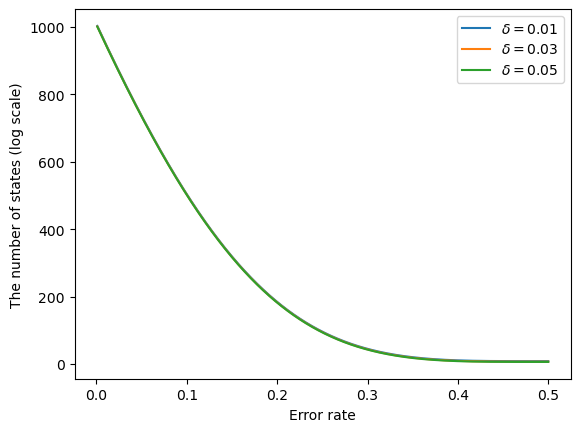

In [127]:
n = 1000
delta1 = 0.01
delta2 = 0.03
delta3 = 0.05

p = np.linspace(0.001, 0.5, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    y1.append(np.log2(4*nu1_p(p[i])**n/delta1))
    y2.append(np.log2(4*nu1_p(p[i])**n/delta2))
    y3.append(np.log2(4*nu1_p(p[i])**n/delta3))

plt.xlabel('Error rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$\delta = 0.01$')
plt.plot(p, y2, label='$\delta = 0.03$')
plt.plot(p, y3, label='$\delta = 0.05$')
plt.legend()
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Dephasing error (FLO), $\delta = 0.01$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:12: RuntimeWarning: overflow encountered in scalar power
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:13: RuntimeWarning: overflow encountered in scalar power
  y3.append(np.log2(4*nu1_p(p[i])**n3/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:12: RuntimeWarning: overflow encountered in scalar multiply
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:12: RuntimeWarning: overflow encountered in scalar divide
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\2062181863.py:13

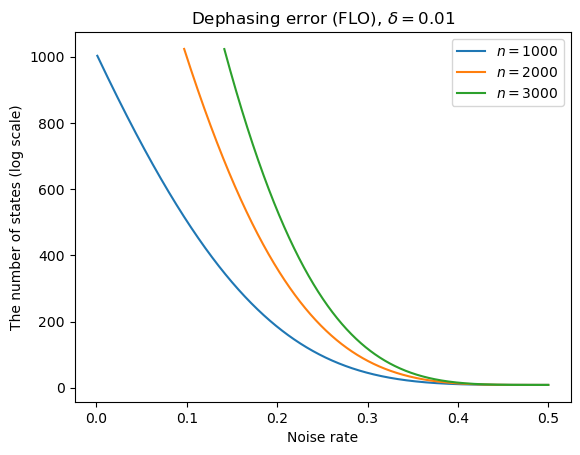

In [25]:
delta = 0.01
n1 = 1000
n2 = 2000
n3 = 3000

p = np.linspace(0.001, 0.5, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    y1.append(np.log2(4*nu1_p(p[i])**n1/delta))
    y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
    y3.append(np.log2(4*nu1_p(p[i])**n3/delta))

plt.xlabel('Noise rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$n=1000$')
plt.plot(p, y2, label='$n=2000$')
plt.plot(p, y3, label='$n=3000$')
plt.legend()
plt.title('Dephasing error (FLO), $\delta = 0.01$')
plt.savefig('Dephaisng over n.png')
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Dephasing error (FLO), $\delta = 0.05$')
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:12: RuntimeWarning: overflow encountered in scalar power
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:13: RuntimeWarning: overflow encountered in scalar power
  y3.append(np.log2(4*nu1_p(p[i])**n3/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:12: RuntimeWarning: overflow encountered in scalar multiply
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:12: RuntimeWarning: overflow encountered in scalar divide
  y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_36044\3936162304.py:13

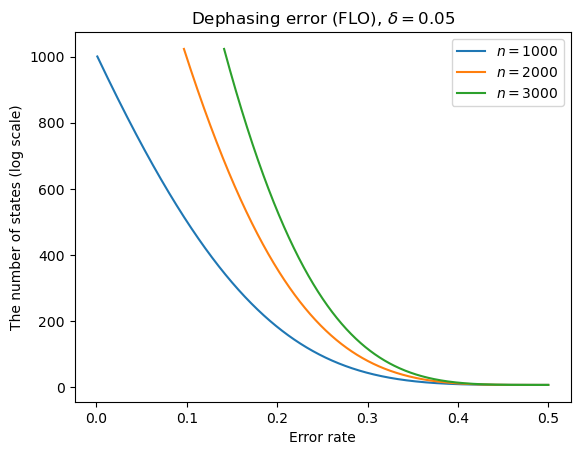

In [137]:
delta = 0.05
n1 = 1000
n2 = 2000
n3 = 3000

p = np.linspace(0.001, 0.5, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    y1.append(np.log2(4*nu1_p(p[i])**n1/delta))
    y2.append(np.log2(4*nu1_p(p[i])**n2/delta))
    y3.append(np.log2(4*nu1_p(p[i])**n3/delta))

plt.xlabel('Error rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$n=1000$')
plt.plot(p, y2, label='$n=2000$')
plt.plot(p, y3, label='$n=3000$')
plt.legend()
plt.title('Dephasing error (FLO), $\delta = 0.05$')
plt.savefig('Dephasing over n.png')
plt.show()


# Qubit: The worst case

In [27]:
def probability_nonGaussian(p):
    # 0<p<1/2
    if 0 <= p < 0.5*(1-np.tan(np.pi/8)):
        return 1-(2+np.sqrt(2))*p
    elif 0.5*(1-np.tan(np.pi/8)) <= p <= 1/2:
        return 0
    else: 
        print("p is out of the region")
        return


In [5]:
probability_nonGaussian(-0.001)

p is out of the region


In [29]:
def find_k_qubit(n,p,delta):
    k = np.ceil(n*(probability_nonGaussian(p)+np.sqrt(np.log(1/delta)/(2*n))))
    if k < n:
        return k
    else:
        return n

In [65]:
ps[1998]

0.29274719919423614

In [31]:
def find_k_qubit2(n,p,delta):
    k = np.ceil(n*(1-(2+np.sqrt(2))*p+np.sqrt(np.log(1/delta)/(2*n))))
    return k

In [33]:
def required_bytes_qubit(n, p, delta):
    nu0 = np.cos(np.pi/8)
    k = find_k_qubit2(n,p,delta)
    return (4*nu0**(-2*k)/delta)*((4*n**2+2*n)/8 + 8)

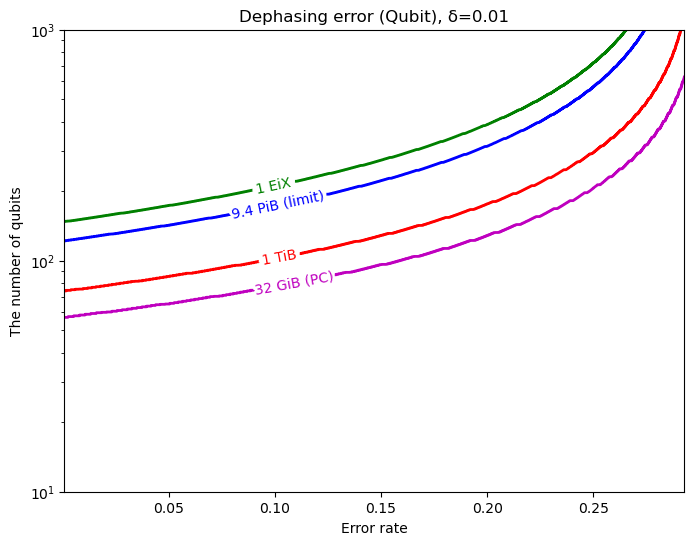

In [109]:
delta = 0.01
ps = np.linspace(0.001, 0.5*(1-np.tan(np.pi/8)), 2000)
ns = np.linspace(10, 1000, 2000)
P, N = np.meshgrid(ps, ns)
Z = required_bytes_qubit(N, P, delta) 

fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')

CS_pb = ax.contour(P, N, Z, levels=[9.4*(1024**5)],
                   colors='blue', linewidths=2)
ax.clabel(CS_pb, inline=True, fmt={9.4*(1024**5): '9.4 PiB (limit)'},
          manual=[(0.1,200)], fontsize=10)

CS_ex = ax.contour(P, N, Z, levels=[1024**6],
                   colors='green', linewidths=2)
ax.clabel(CS_ex, inline=True, fmt={1024**6: '1 EiX'},
          manual=[(0.1,200)], fontsize=10)

CS_tb = ax.contour(P, N, Z, levels=[1024**4],
                   colors='red', linewidths=2)
ax.clabel(CS_tb, inline=True, fmt={1024**4: '1 TiB'},
          manual=[(0.1,200)], fontsize=10)

CS_gb = ax.contour(P, N, Z, levels=[32*1024**3],
                   colors='m', linewidths=2)
ax.clabel(CS_gb, inline=True, fmt={32*1024**3: '32 GiB (PC)'},
          manual=[(0.1,200)], fontsize=10)

ax.set_title('Dephasing error (Qubit), δ=0.01')
ax.set_xlabel('Error rate')
ax.set_ylabel('The number of qubits')
plt.savefig('Dephasing error_qubit.png')
plt.show()

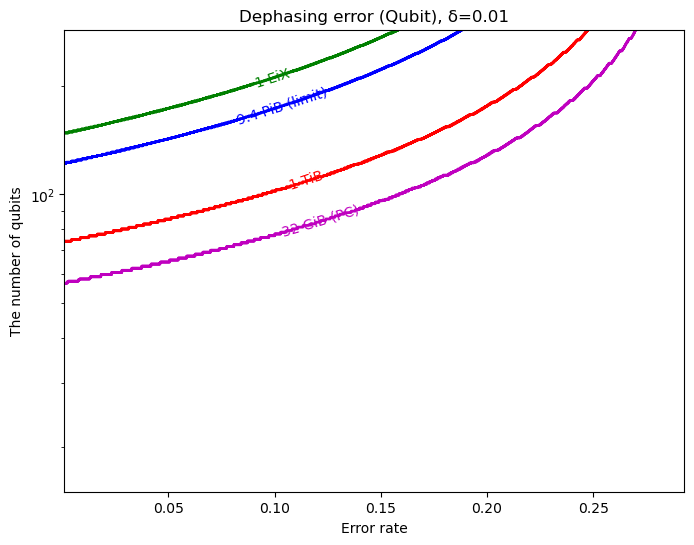

In [127]:
delta = 0.01
ps = np.linspace(0.001, 0.5*(1-np.tan(np.pi/8)), 2000)
ns = np.linspace(10, 1000, 2000)
ks = []
for i in range(len(ps)):
    ks.append(find_k_qubit2(ns[i],ps[i],delta))
ks = np.array(ks)
P, N = np.meshgrid(ps, ns)
Z = required_bytes_qubit(N, P, delta) 

fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')

# draw all contours with zorder=1
CS_pb = ax.contour(P, N, Z, levels=[9.4*(1024**5)],
                   colors='blue', linewidths=2, zorder=1)
CS_ex = ax.contour(P, N, Z, levels=[1024**6],
                   colors='green', linewidths=2, zorder=1)
CS_tb = ax.contour(P, N, Z, levels=[1024**4],
                   colors='red', linewidths=2, zorder=1)
CS_gb = ax.contour(P, N, Z, levels=[32*1024**3],
                   colors='m', linewidths=2, zorder=1)

# now label them, bumping the text to zorder=2
txt1 = ax.clabel(CS_pb, inline=True, fmt={9.4*(1024**5): '9.4 PiB (limit)'},
                 manual=[(0.1,200)], fontsize=10)
txt2 = ax.clabel(CS_ex, inline=True, fmt={1024**6: '1 EiX'},
                 manual=[(0.1,200)], fontsize=10)
txt3 = ax.clabel(CS_tb, inline=True, fmt={1024**4: '1 TiB'},
                 manual=[(0.1,200)], fontsize=10)
txt4 = ax.clabel(CS_gb, inline=True, fmt={32*1024**3: '32 GiB (PC)'},
                 manual=[(0.1,200)], fontsize=10)

# set all label texts to zorder=2
for txt in (txt1 + txt2 + txt3 + txt4):
    txt.set_zorder(2)

ax.set_title('Dephasing error (Qubit), δ=0.01')
ax.set_xlabel('Error rate')
ax.set_ylabel('The number of qubits')
plt.show()



In [37]:
#Find k
def kl_divergence(a, p):
    """KL divergence D(a || p) for Bernoulli(a) vs Bernoulli(p)."""
    if a == 0:
        return (1 - a) * math.log((1 - a) / (1 - p))
    if a == 1:
        return a * math.log(a / p)
    return a * math.log(a / p) + (1 - a) * math.log((1 - a) / (1 - p))

def find_k_chernoff(n, p, delta):
    """
    Return the smallest k >= ceil(n*p) such that
      exp(-n * D(k/n || p)) < delta.
    Runs in O(log n) time.
    """
    low = math.ceil(n * p)
    high = n
    # Precompute the threshold for divergence
    target = math.log(1 / delta) / n

    # Binary search for minimal k with D(k/n || p) > target
    while low < high:
        mid = (low + high) // 2
        if kl_divergence(mid / n, p) > target:
            high = mid
        else:
            low = mid + 1
    return low

In [11]:
find_k_chernoff(1000, probability_nonGaussian(0.2), 0.001)

373

In [35]:
def find_k_qubit(n, p, delta):
    return np.ceil(n*(1-(2+np.sqrt(2))*p + np.sqrt(np.log(1/delta)/(2*n))))

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_24828\4292266688.py:25: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Dephasing error (Qubit), $\delta=0.01$')


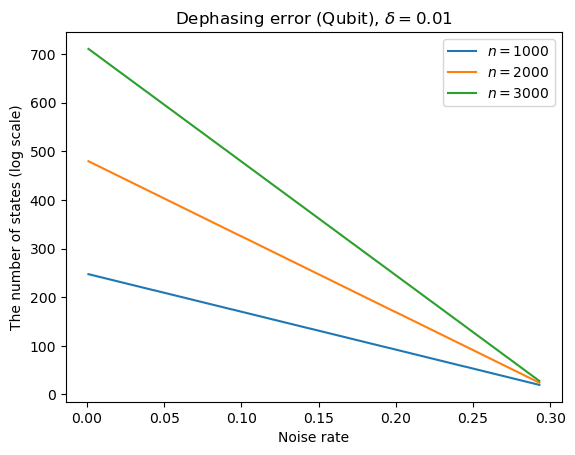

In [41]:
nu0 = np.cos(np.pi/8)**(-2)
delta = 0.01
n1 = 1000
n2 = 2000
n3 = 3000

p = np.linspace(0.001, (1-np.tan(np.pi/8))/2, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k_qubit(n1, p[i], delta)
    k2 = find_k_qubit(n2, p[i], delta)
    k3 = find_k_qubit(n3, p[i], delta)
    y1.append(np.log2(4*nu0**k1/delta))
    y2.append(np.log2(4*nu0**k2/delta))
    y3.append(np.log2(4*nu0**k3/delta))

plt.xlabel('Noise rate')
plt.ylabel('The number of states (log scale)')
plt.plot(p, y1, label='$n=1000$')
plt.plot(p, y2, label='$n=2000$')
plt.plot(p, y3, label='$n=3000$')
plt.legend()
plt.title('Dephasing error (Qubit), $\delta=0.01$')
plt.savefig('Dephasing error with qubit over n.png')
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_30000\2849933763.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$n=1000, \delta=0.0001$")


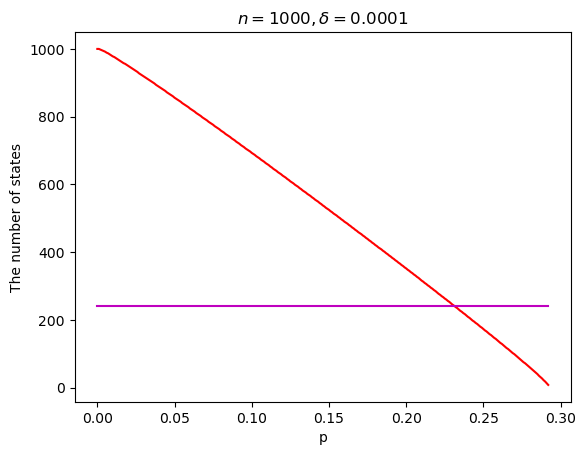

In [264]:
p = np.arange(0,0.5*(1-np.tan(np.pi/8)), 0.001)
n=1000
delta = 0.0001
thr = [-2*np.log2(np.cos(np.pi/8))*n+np.log2(1/delta)]*len(p)
y = []
for i in range(len(p)):
    y.append(find_k(n,probability_nonGaussian(p[i]),np.sqrt(delta))[0])

plt.plot(p, y, color='red')
plt.plot(p, thr, color='m')
plt.xlabel("p")
plt.ylabel("The number of states")
plt.title("$n=1000, \delta=0.0001$")
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_30000\553625218.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$n=100, \delta=0.01$")


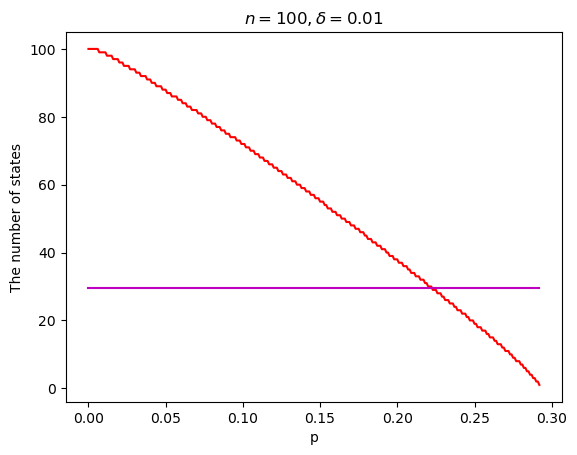

In [292]:
p = np.arange(0,0.5*(1-np.tan(np.pi/8)), 0.001)
n=100
delta = 0.01
thr = [-2*np.log2(np.cos(np.pi/8))*n+np.log2(1/delta)]*len(p)
y = []
for i in range(len(p)):
    y.append(find_k(n,probability_nonGaussian(p[i]),np.sqrt(delta))[0])

plt.plot(p, y, color='red')
plt.plot(p, thr, color='m')
plt.xlabel("p")
plt.ylabel("The number of states")
plt.title("$n=100, \delta=0.01$")
plt.show()


# Qubit: The average case

In [15]:
def Average_cost(n, p, delta):
    tmp = find_k(n, p, delta)
    k = tmp[0]
    discard = tmp[1]
    res = 0
    for i in range(0, k+1):
        res += math.comb(n,i)*p**i*(1-p)**(n-i)*2**i
    return res/(1-discard)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_30000\324551672.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$n=1000, \delta=0.0001$")


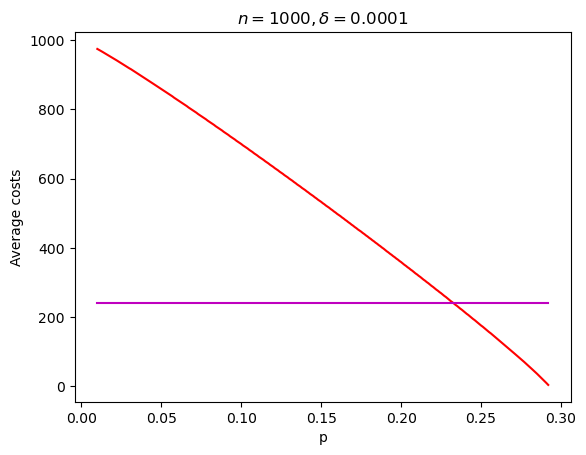

In [266]:
p = np.arange(0.01,0.5*(1-np.tan(np.pi/8)), 0.001)
n=1000
delta = 0.0001
thr = [-2*np.log2(np.cos(np.pi/8))*n+np.log2(1/delta)]*len(p)
y = []
for i in range(len(p)):
    y.append(np.log2(Average_cost(n, probability_nonGaussian(p[i]),delta)))

plt.plot(p, y, color='red')
plt.plot(p, thr, color='m')
plt.xlabel("p")
plt.ylabel("Average costs")
plt.title("$n=1000, \delta=0.0001$")
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_12932\669641805.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$n=1000, \delta=0.01$")


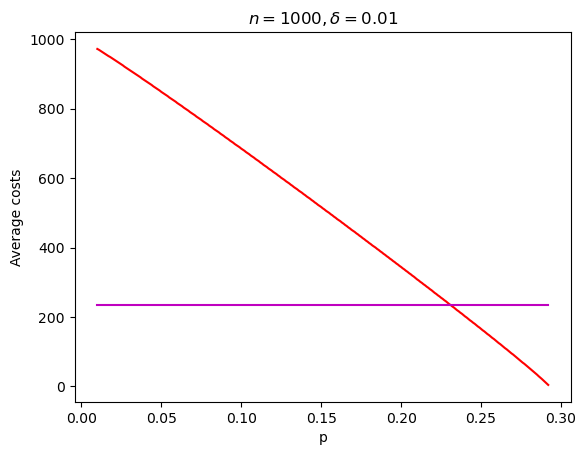

In [17]:
p = np.arange(0.01,0.5*(1-np.tan(np.pi/8)), 0.001)
n=1000
delta = 0.01
thr = [-2*np.log2(np.cos(np.pi/8))*n+np.log2(1/delta)]*len(p)
y = []
for i in range(len(p)):
    y.append(np.log2(Average_cost(n, probability_nonGaussian(p[i]),delta)))

plt.plot(p, y, color='red')
plt.plot(p, thr, color='m')
plt.xlabel("p")
plt.ylabel("Average costs")
plt.title("$n=1000, \delta=0.01$")
plt.show()
